In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import haversine
%matplotlib inline

In [2]:
fn = "../data/deped_school_location_with_enrolment_2017_2018_geocoded1.csv"
df = pd.read_csv(fn)

In [3]:
df.head(2)

,SCHOOL ID,SCHOOL NAME,ADDRESS,REGION,DIVISION,MUNICIPALITY,BARANGGAY,LATITUDE,LONGITUDE,MAPPED,SCHOOL NAME2,ADDRESS1,ADDRESS2,GMAP_MAPPED,GMAP_LAT1,GMAP_LON1,GMAP_LAT2,GMAP_LON2,GMAP_DELTA_KM
0,500000,CARAITAN INTEGRATED SCHOOL,"CARAITAN, BADOC, ILOCOS NORTE, BRGY. CARAITAN,...",REGION I,ILOCOS NORTE,BADOC,CARAITAN,NaN,NaN,0,CARAITAN INTEGRATED SCHOOL,"CARAITAN INTEGRATED SCHOOL, CARAITAN, BADOC, I...","CARAITAN, BADOC, ILOCOS NORTE, BRGY. CARAITAN,...",1,17.904161,120.487604,17.904161,120.487604,0.000000
1,500594,UGUIS INTEGRATED SCHOOL,"BRGY. 9, UGUIS, BRGY. UGUIS, NUEVA ERA",REGION I,ILOCOS NORTE,NUEVA ERA,UGUIS,NaN,NaN,0,UGUIS INTEGRATED SCHOOL,"UGUIS INTEGRATED SCHOOL, BRGY. 9, UGUIS, BRGY....","BRGY. 9, UGUIS, BRGY. UGUIS, NUEVA ERA, PHILIP...",1,17.941025,120.734843,17.841665,120.575476,20.160737


In [4]:
len(df)

6144

In [5]:
df1 = df[df["MAPPED"]==1] # baseline: random mapped schools
df2 = df[df["MAPPED"]==0] # unmapped schools 

In [6]:
# filter out schools w/non-specified addresses (GMAP_DELTA_KM = 0)
df1b = df1[df1["GMAP_DELTA_KM"]!=0]
df2b = df2[df2["GMAP_DELTA_KM"]!=0]
len(df1b), len(df2b)

(842, 3659)

In [7]:
len(df1b)*1./len(df1), len(df2b)*1./len(df2) # pct. of schools w/specified address

(0.842, 0.7113141524105754)

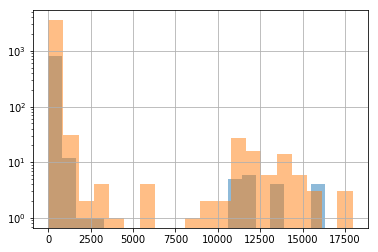

In [13]:
df1b["GMAP_DELTA_KM"].hist(bins=20, log=True, alpha=0.5)
df2b["GMAP_DELTA_KM"].hist(bins=20, log=True, alpha=0.5)

In [39]:
nu1 = len(df2b[df2b["GMAP_DELTA_KM"]<100])
nu1, len(df2b), nu1*1./len(df2b)

(3309, 3659, 0.904345449576387)

In [20]:
# get delta = distance between DEPED and GMAP coordinates
delta = np.zeros(len(df1b)) + np.nan
for i in np.arange(len(df1b)):
    j = df1b.index[i]
    lon1, lat1 = df1b.loc[j, "LONGITUDE"], df1b.loc[j, "LATITUDE"] # DepEd coordinates
    lon2, lat2 = df1b.loc[j, "GMAP_LON1"], df1b.loc[j, "GMAP_LAT1"] # GMap coordinates
    coord1, coord2 = (lon1, lat1), (lon2, lat2)
    delta_km = haversine.Haversine(coord1, coord2).km
    delta[i] = delta_km

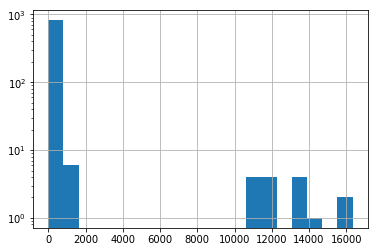

In [23]:
pd.Series(delta).hist(bins=20, log=True)

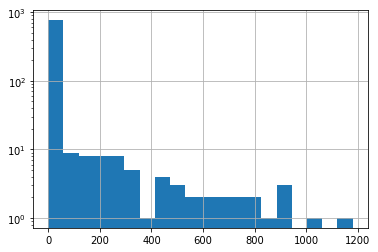

In [25]:
pd.Series(delta[delta<2000]).hist(bins=20, log=True)

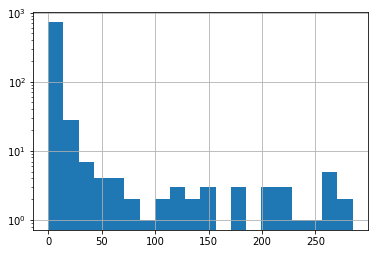

In [31]:
pd.Series(delta[delta<300]).hist(bins=20, log=True)

In [27]:
df1b["DELTA"] = delta

/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


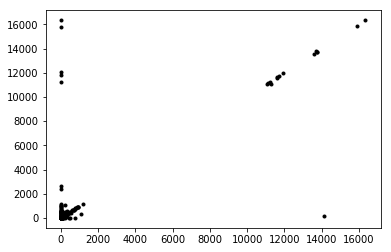

In [29]:
x, y = df1b["DELTA"], df1b["GMAP_DELTA_KM"]
plt.plot(x, y, 'k.')

(0, 100)

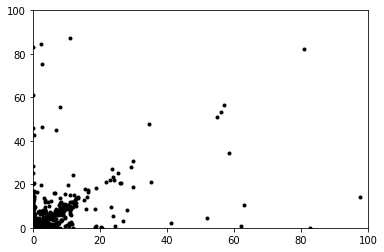

In [30]:
plt.plot(x, y, 'k.')
plt.xlim(0, 100)
plt.ylim(0, 100)

In [34]:
n1 = len(df1b[df1b["GMAP_DELTA_KM"]<100.])
n1, n1*1./len(df1b)

(737, 0.8752969121140143)

In [36]:
n2 = len(df1b[df1b["DELTA"]<100.])
n2, len(df1b), n2*1./len(df1b)

(770, 842, 0.9144893111638955)

In [37]:
n3 = len(df1b[(df1b["DELTA"]<100.) & (df1b["GMAP_DELTA_KM"]<100.)])
n3, len(df1b), n3*1./len(df1b)

(730, 842, 0.8669833729216152)